In [1]:
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [2]:
data = pd.read_csv('trip.csv')

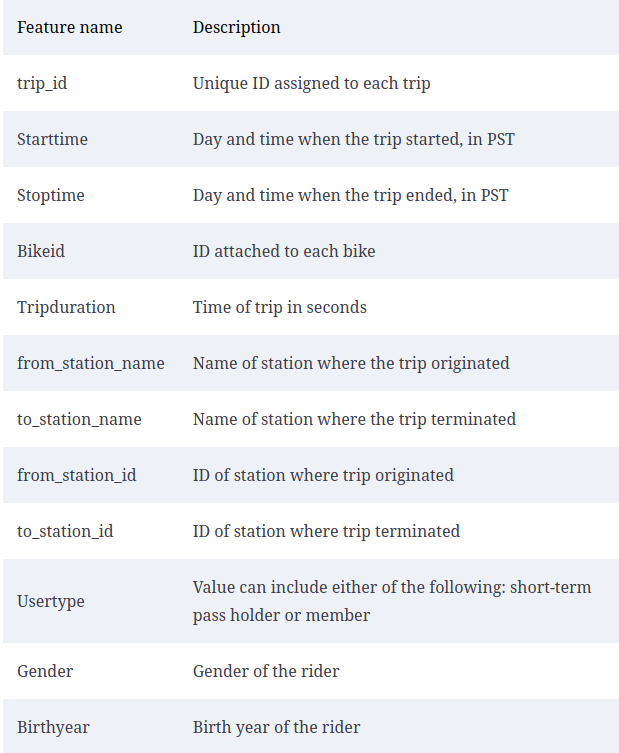

In [3]:
print(len(data)) #MOD
data.head()

236065


trip_id         starttime          stoptime    bikeid  tripduration  \
0      431  10/13/2014 10:31  10/13/2014 10:48  SEA00298       985.935   
1      432  10/13/2014 10:32  10/13/2014 10:48  SEA00195       926.375   
2      433  10/13/2014 10:33  10/13/2014 10:48  SEA00486       883.831   
3      434  10/13/2014 10:34  10/13/2014 10:48  SEA00333       865.937   
4      435  10/13/2014 10:34  10/13/2014 10:49  SEA00202       923.923   

     from_station_name                                    to_station_name  \
0  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
1  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
2  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
3  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   
4  2nd Ave & Spring St  Occidental Park / Occidental Ave S & S Washing...   

  from_station_id to_station_id usertype  gender  birthyear  
0          CBD-06         PS-04   Member    Male     1960.0  
1          CBD-06         PS-04   Member    Male     1970.0  
2          CBD-06         PS-04   Member  Female     1988.0  
3          CBD-06         PS-04   Member  Female     1977.0  
4          CBD-06         PS-04   Member    Male     1971.0

In [4]:
data = data.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime'])) #

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


<Axes: title={'center': 'Distribution of user types'}, xlabel='usertype'>

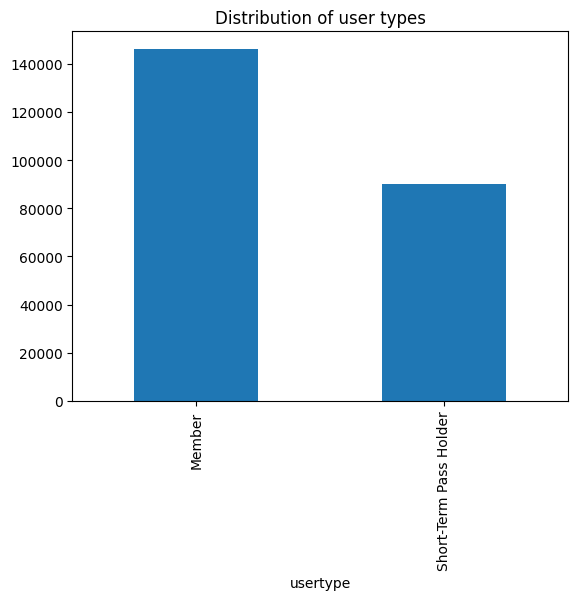

In [5]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

<Axes: title={'center': 'Distribution of genders'}, xlabel='gender'>

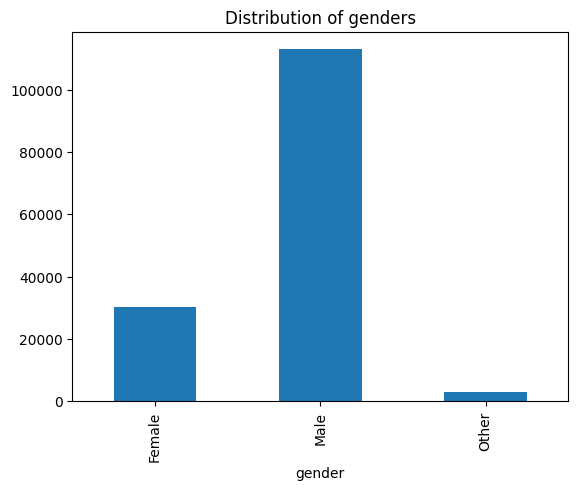

In [6]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

<Axes: title={'center': 'Distribution of birth years'}, xlabel='birthyear'>

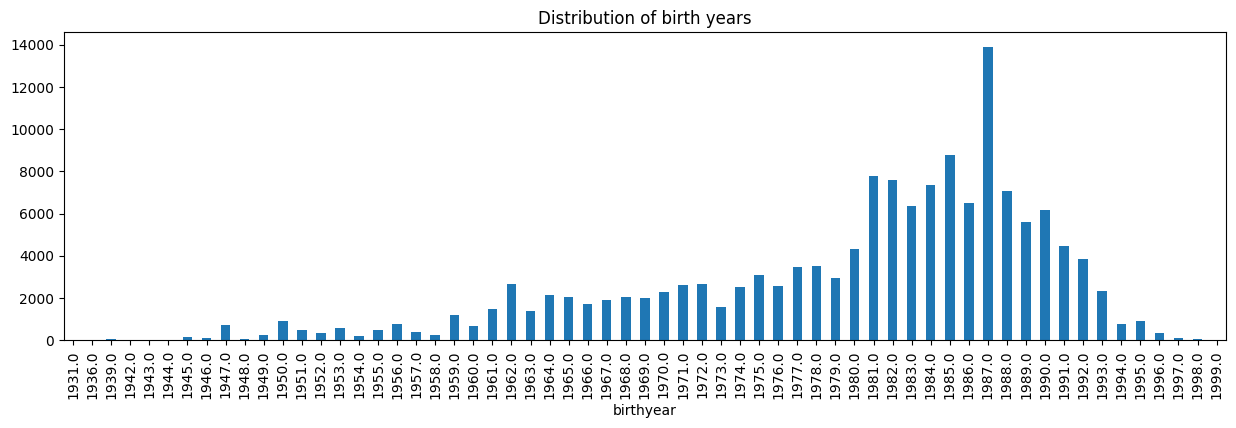

In [7]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

<Axes: title={'center': 'Distribution of user types'}, xlabel='usertype'>

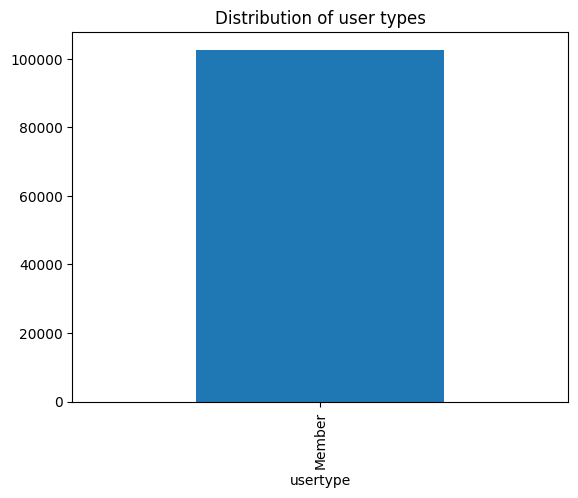

In [8]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

<Axes: xlabel='tripduration'>

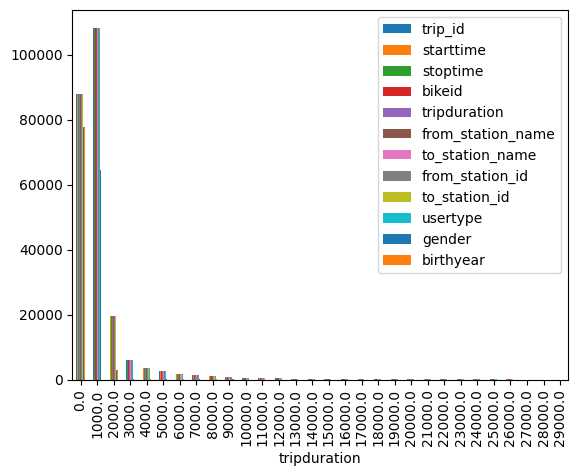

In [9]:
trip = data[["tripduration"]].apply(lambda x: round(x, -3))["tripduration"]
pd.cut(trip.to_list(), 10)
datatrip = data.groupby(trip).count()
datatrip.plot.bar()

<Axes: title={'center': 'Distribution of birth years by Gender'}, xlabel='birthyear'>

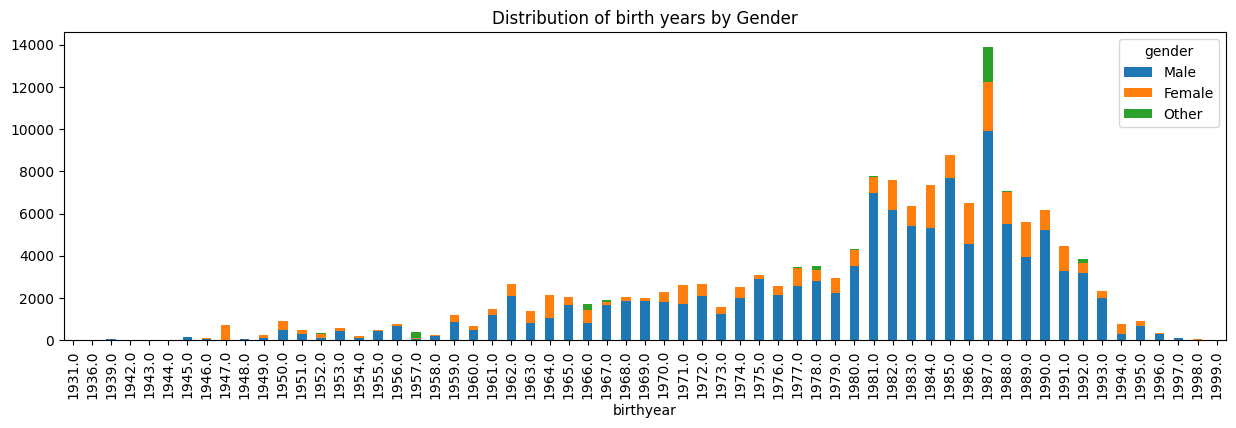

In [10]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

<Axes: title={'center': 'Distribution of Average Trip Duration by Gender'}, xlabel='tripduration'>

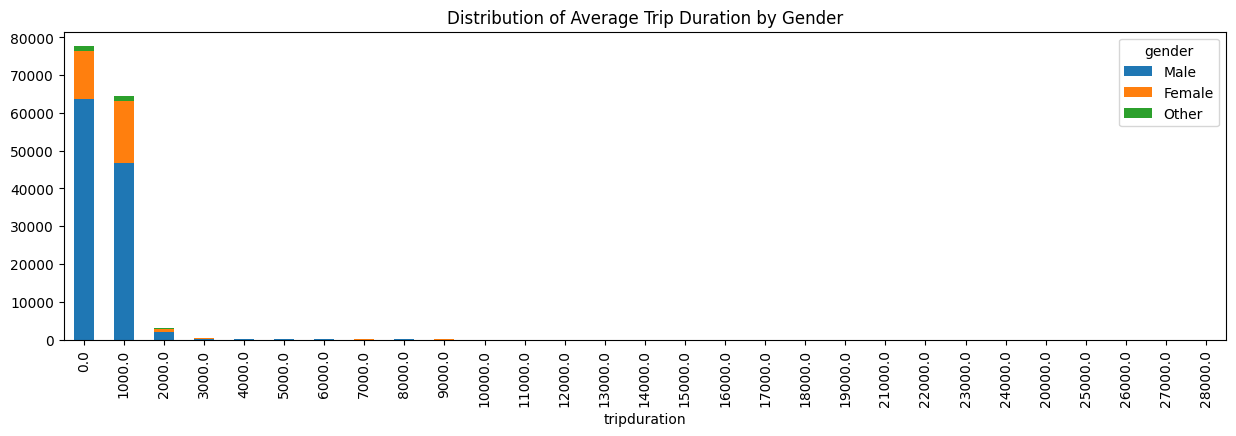

In [11]:
rounded_data = data.apply(lambda x: round(x, -3))
groupby_gender_trip = rounded_data.groupby(["gender", "tripduration"])["tripduration"].count().unstack("gender")
groupby_gender_trip[["Male", "Female", "Other"]].plot.bar(title = "Distribution of Average Trip Duration by Gender", stacked=True, figsize = (15,4))

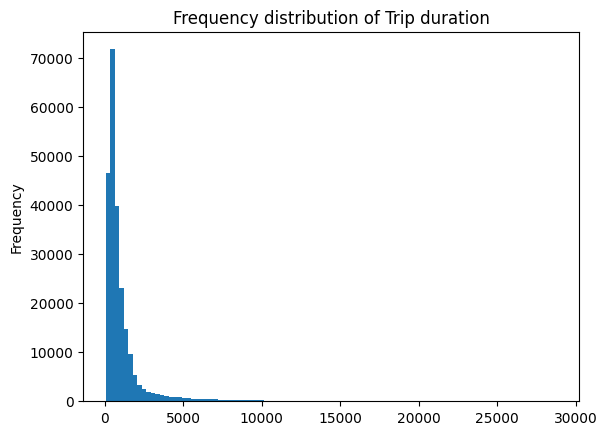

In [12]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

<Axes: title={'center': 'Distribution of birth years by Usertype'}, xlabel='birthyear'>

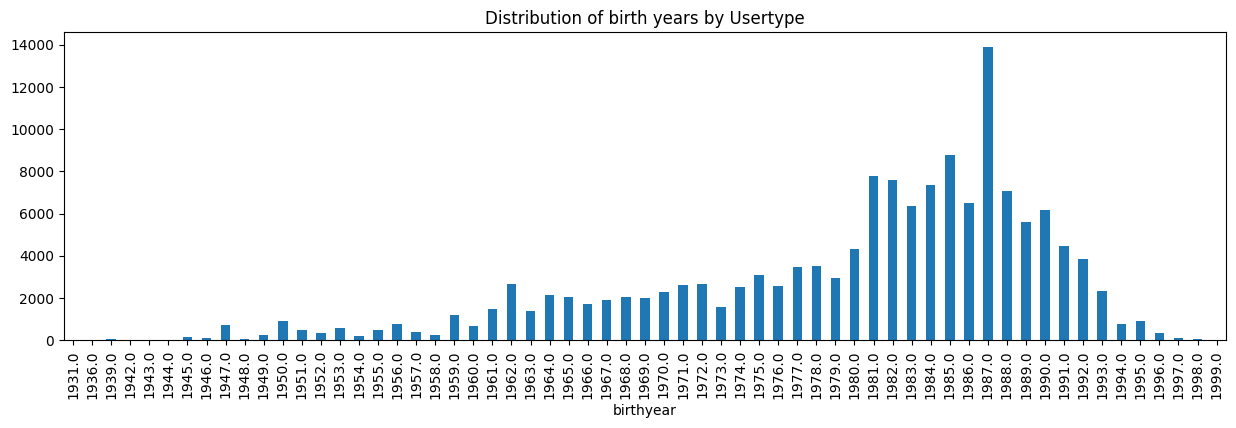

In [13]:
groupby_birthyear_gender = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_gender['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [14]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

np.True_

In [15]:
List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

In [16]:
data[["starttime_date"]]

starttime_date
212893     2016-07-08
133730     2015-09-20
116828     2015-08-15
179564     2016-04-03
13302      2014-11-23
...               ...
128578     2015-09-09
128576     2015-09-09
128580     2015-09-09
128585     2015-09-09
128586     2015-09-09

[236065 rows x 1 columns]

<Axes: title={'center': 'Distribution of Trip duration by date'}, xlabel='starttime_date'>

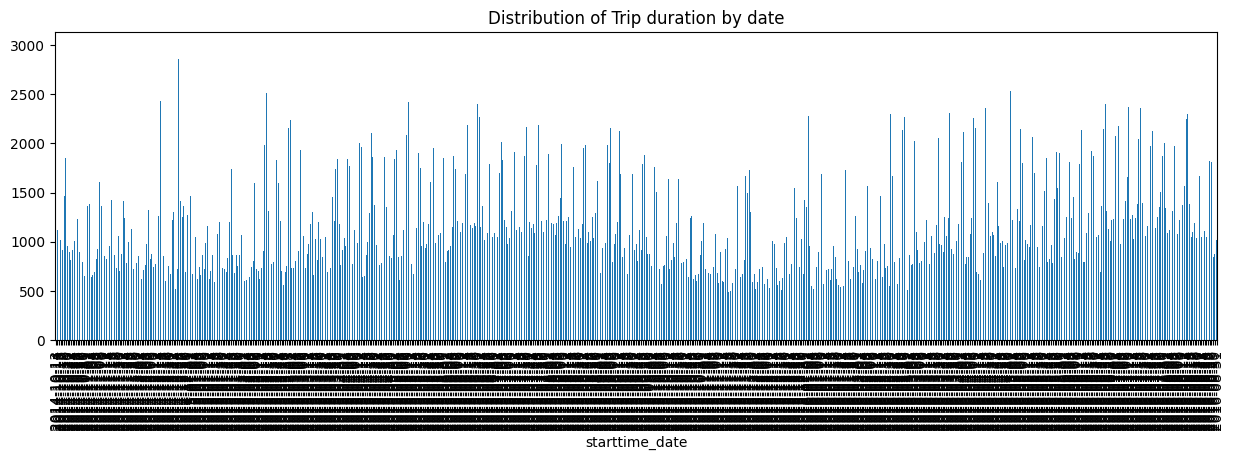

In [17]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

<Axes: title={'center': 'Distribution of Number of Trips by Day'}, xlabel='starttime_day'>

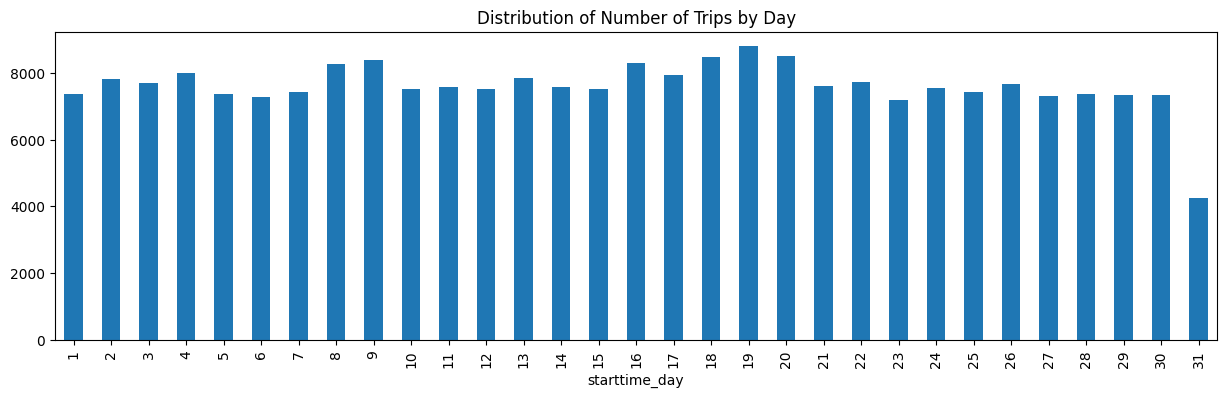

In [18]:
data.groupby('starttime_day')['tripduration'].count().plot.bar(title = 'Distribution of Number of Trips by Day', figsize = (15,4))

<Axes: title={'center': 'Distribution of Frequency of Trips in a Day'}, xlabel='starttime_hour'>

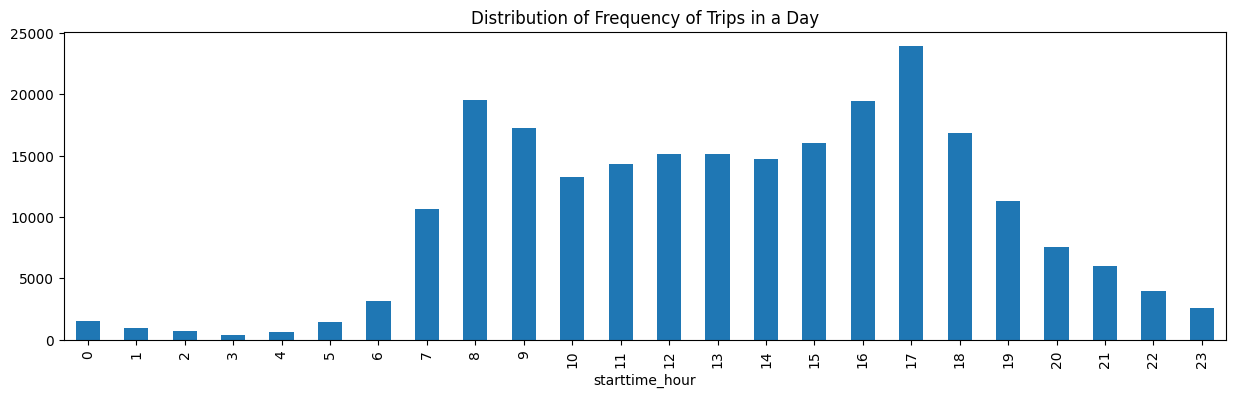

In [19]:
# data = data.sort_values(by='starttime_hour')
# data.reset_index()
data.groupby('starttime_hour')['tripduration'].count().plot.bar(title = 'Distribution of Frequency of Trips in a Day', figsize = (15,4))

In [20]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f'%statistics.mean(trip_duration))
print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from)) # Most common number

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


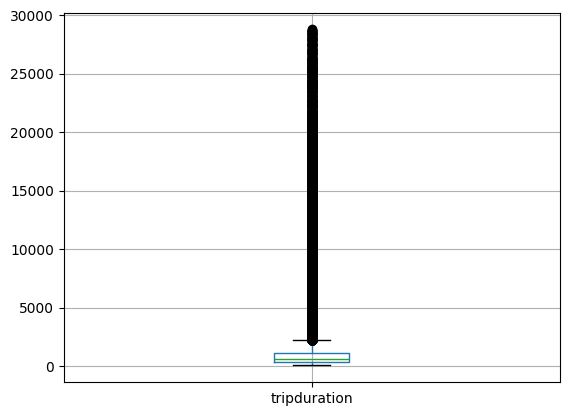

In [21]:
box = data.boxplot(column=['tripduration'])
plt.show()

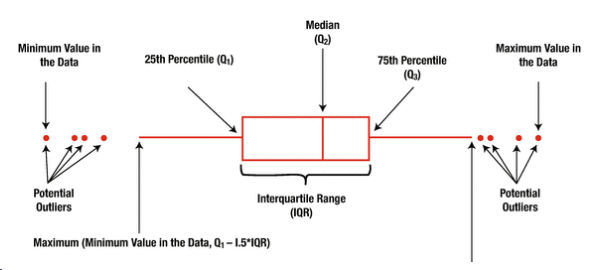

In [22]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25 # interquartile range
print('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))/float(len(data))*100))

Proportion of values as outlier: 9.548218 percent


In [23]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('(Fair) Mean of trip duration: %f'%mean_trip_duration)

(Fair) Mean of trip duration: 711.726573


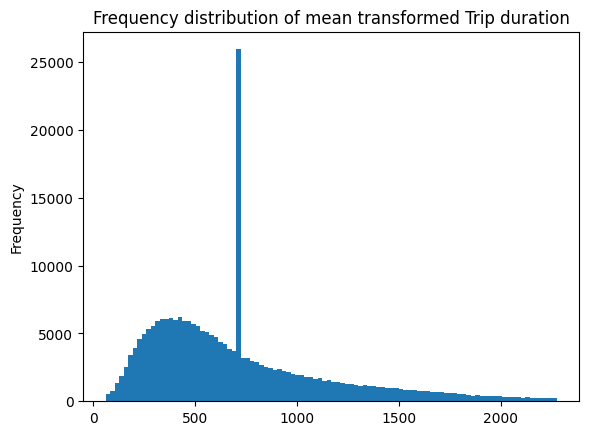

In [25]:
def transform_tripduration(x):

    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [26]:
print('(Fair) Mean of trip duration: %f'%data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print('Median of trip duration: %f'%data['tripduration_mean'].median())

(Fair) Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000


Exercises:  
2. Positively skewed distribution

In [27]:
tripduration_male = data.groupby("gender")["tripduration"].get_group("Male")
print('Mean of Trip Duration of Males: %f'%statistics.mean(tripduration_male))
print('Median of Trip Durationof Males: %f'% statistics.median(tripduration_male))
print('Mode of Trip Duration of Males: %s'%statistics.mode(tripduration_male))

Mean of Trip Duration of Males: 563.402797
Median of Trip Durationof Males: 458.451500
Mode of Trip Duration of Males: 466.174


<Axes: title={'center': 'Frequency distribution of trip duration for males'}, ylabel='Frequency'>

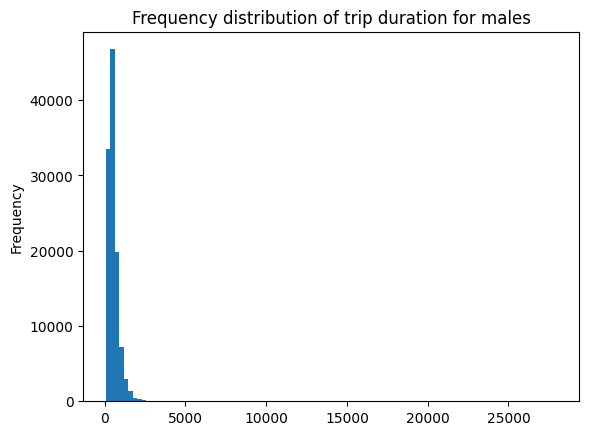

In [28]:
tripduration_male.plot.hist(bins=100, title="Frequency distribution of trip duration for males")

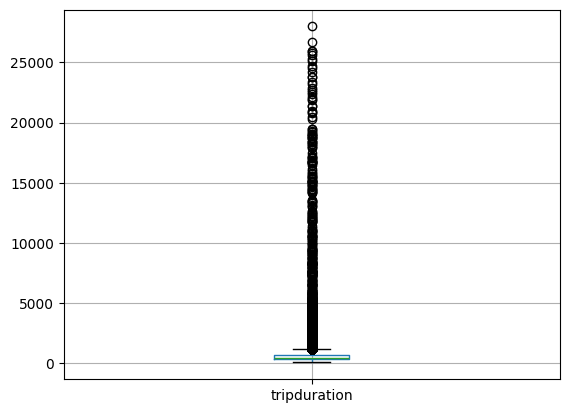

In [29]:
data_male = data.groupby("gender").get_group("Male")
box = data_male.boxplot(column=['tripduration'])
plt.show()

In [30]:
print('Proportion of values as outlier: %f percent'%(
(len(data_male) - len([x for x in tripduration_male if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))/float(len(data_male))*100))

Proportion of values as outlier: 0.666726 percent


/tmp/ipykernel_22024/4241267586.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_male['tripduration_mean'] = data_male['tripduration'].apply(lambda x: transform_tripduration(x))


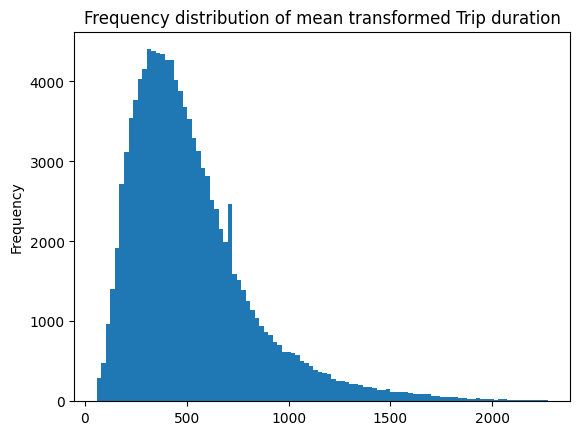

In [31]:
def transform_tripduration(x):

    if x > upper_whisker:
        return mean_trip_duration
    return x

data_male['tripduration_mean'] = data_male['tripduration'].apply(lambda x: transform_tripduration(x))

data_male['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

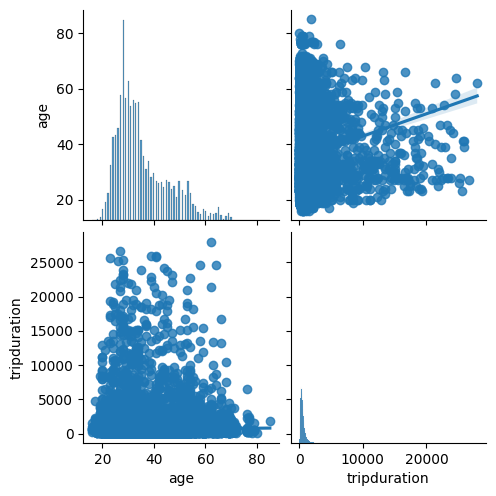

In [41]:
data["age"] = data["starttime_year"] - data["birthyear"]

data = data.dropna()
seaborn.pairplot(data, vars=["age", "tripduration"], kind="reg")
plt.show()

In [43]:
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)


correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


In [45]:
for cat in ['gender','usertype']:
    print('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -38.573753, P value: 0.000000


Female Other
Statistic: 48.234386, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype



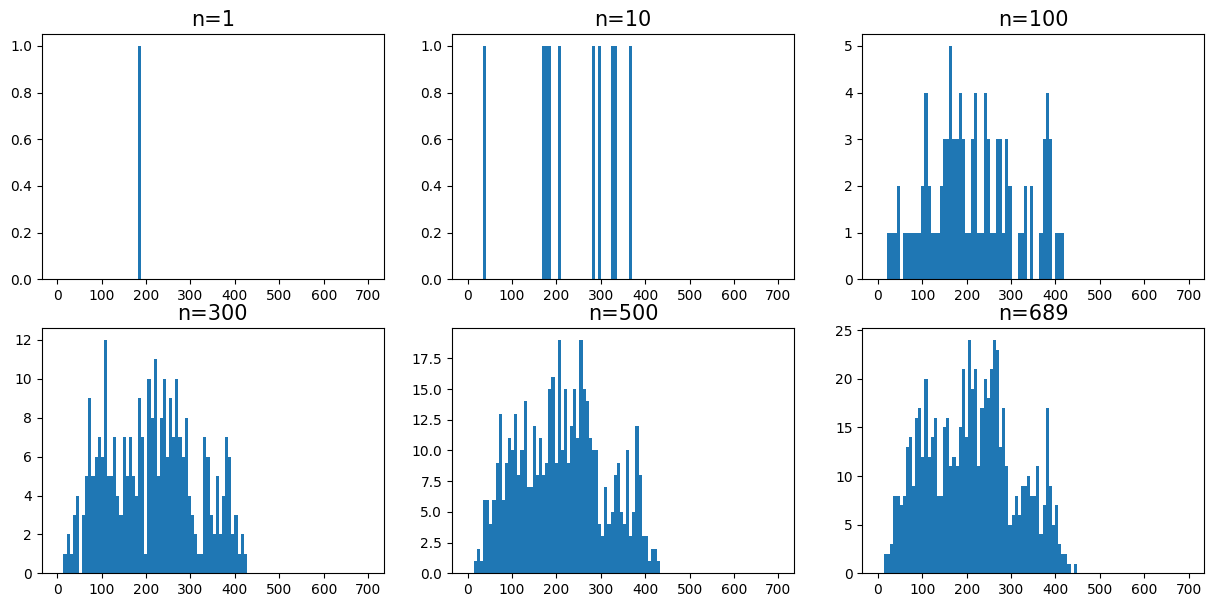

In [87]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
       break

plt.show()